In [13]:
import numpy as np
import pandas as pd
import geopandas as gpd
import folium
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
nepal_geo_df_shapefile = gpd.read_file("./data/local_unit.shp")
nepal_geo_df_shapefile.head()

,STATE_CODE,DISTRICT,GaPa_NaPa,Type_GN,Province,geometry
0,1,TAPLEJUNG,Aathrai Tribeni,Gaunpalika,1,"POLYGON ((87.60985 27.37043, 87.61107 27.36943..."
1,1,TAPLEJUNG,Maiwakhola,Gaunpalika,1,"POLYGON ((87.50402 27.42901, 87.50672 27.42831..."
2,1,TAPLEJUNG,Meringden,Gaunpalika,1,"POLYGON ((87.51272 27.56894, 87.51255 27.56859..."
3,1,TAPLEJUNG,Mikwakhola,Gaunpalika,1,"POLYGON ((87.6885 27.70975, 87.68891 27.70938,..."
4,1,TAPLEJUNG,Phaktanglung,Gaunpalika,1,"POLYGON ((87.83673 27.95137, 87.83735 27.95119..."


In [3]:
nepal_geo_df_json = gpd.read_file("./data/nepal-districts.topojson")
nepal_geo_df_json.head()

,id,name,geometry
0,Humla,Humla,"POLYGON ((82.49875 29.95084, 82.4963 29.94347,..."
1,Darchula,Darchula,"POLYGON ((80.79304 29.68616, 80.79222 29.68739..."
2,Bajhang,Bajhang,"POLYGON ((81.09064 30.05491, 81.09064 30.05368..."
3,Mugu,Mugu,"POLYGON ((82.49875 29.95084, 82.50038 29.94797..."
4,Bajura,Bajura,"POLYGON ((81.50647 29.89594, 81.50892 29.89758..."


In [4]:
us_states = gpd.read_file("./data/us-states.json")
us_states.head()

,id,name,geometry
0,01,Alabama,"POLYGON ((-87.3593 35.00118, -85.60668 34.9847..."
1,02,Alaska,"MULTIPOLYGON (((-131.60202 55.11798, -131.5691..."
2,04,Arizona,"POLYGON ((-109.0425 37.00026, -109.04798 31.33..."
3,05,Arkansas,"POLYGON ((-94.47384 36.50186, -90.15254 36.496..."
4,06,California,"POLYGON ((-123.23326 42.00619, -122.37885 42.0..."


In [5]:
# This section is generated by using ChatGPT.
'''
My Prompt:

    Unnamed: 0  permit       city state    zip  district date_issued     lat     lng
0             0   288.0  Nashville    TN  37211      30.0  11/26/2014  36.029 -86.725

Generate similar kind of dataframe programmatically in python for Nepal's data, use Nepal's lat and long.
do for the cities of Bagmati State only: Kathmandu, Lalitpur, Bhaktapur, Chitwan, Rasuwa, 
Ramechhap, Kavre, Makhwanpur, Dhading, Nuwakot, Sindhupalchoke, Dolakha, Sindhuli.
'''

n = 313

# Chicken Sample data for cities in Nepal, reusing them across 313 rows
cities = ['Kathmandu', 'Lalitpur', 'Bhaktapur', 'Chitwan', 'Rasuwa', 'Ramechhap', 
          'Kavre', 'Makwanpur', 'Dhading', 'Nuwakot', 'Sindhupalchok', 'Dolakha', 'Sindhuli']

latitudes = [27.7472, 27.6766, 27.6730, 27.5291, 28.2286, 27.3217, 
             27.6134, 27.4287, 27.9261, 27.8707, 27.7980, 27.7000, 27.2557]

longitudes = [85.3240, 85.3147, 85.4270, 84.3542, 85.2875, 86.0872, 
              85.5466, 85.0322, 84.8665, 85.1631, 85.7002, 86.0458, 85.9713]

zips = ['44600', '44700', '44800', '44200', '45007', '45400', 
        '45200', '44100', '45100', '44900', '45300', '45500', '45600']

# Generate the DataFrame
data = {
    'Unnamed: 0': np.arange(n),  # Sequential numbering
    'permit': np.random.randint(100, 1000, size=n),  # Random permit numbers
    'city': np.random.choice(cities, size=n),  # Randomly pick cities from the list
    'state': ['Bagmati'] * n,  # Assuming these cities are in Bagmati Province
    'zip': np.random.choice(zips, size=n),  # Random zip codes from the list
    'district': np.random.randint(1, 30, size=n).astype(float),  # Random district numbers
    'date_issued': pd.date_range(start='2023-01-01', periods=n).strftime('%m/%d/%Y'),  # Random dates
    'lat': np.random.choice(latitudes, size=n),  # Random latitudes from the list
    'lng': np.random.choice(longitudes, size=n)  # Random longitudes from the list
}

chickens_df = pd.DataFrame(data)
chickens_df.head()

,Unnamed: 0,permit,city,state,zip,district,date_issued,lat,lng
0,0,114,Ramechhap,Bagmati,45600,2.0,01/01/2023,27.6766,85.1631
1,1,463,Ramechhap,Bagmati,45500,5.0,01/02/2023,27.7980,85.5466
2,2,856,Chitwan,Bagmati,45007,27.0,01/03/2023,27.7472,85.3240
3,3,880,Bhaktapur,Bagmati,45200,28.0,01/04/2023,27.7472,84.3542
4,4,938,Kathmandu,Bagmati,45100,23.0,01/05/2023,27.2557,85.1631


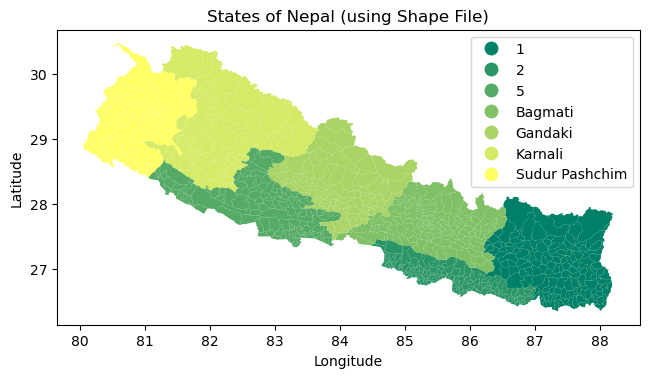

In [6]:
nepal_geo_df_shapefile.plot(column="Province", cmap="summer", legend=True)
plt.tight_layout()
plt.title('States of Nepal (using Shape File)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

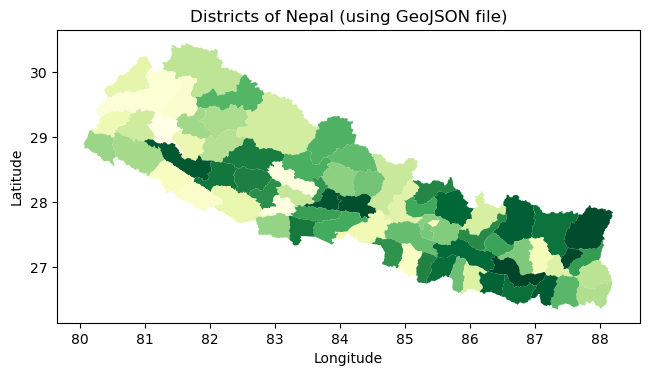

In [7]:
nepal_geo_df_json.plot(column="name", cmap="YlGn")
plt.tight_layout()
plt.title('Districts of Nepal (using GeoJSON file)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

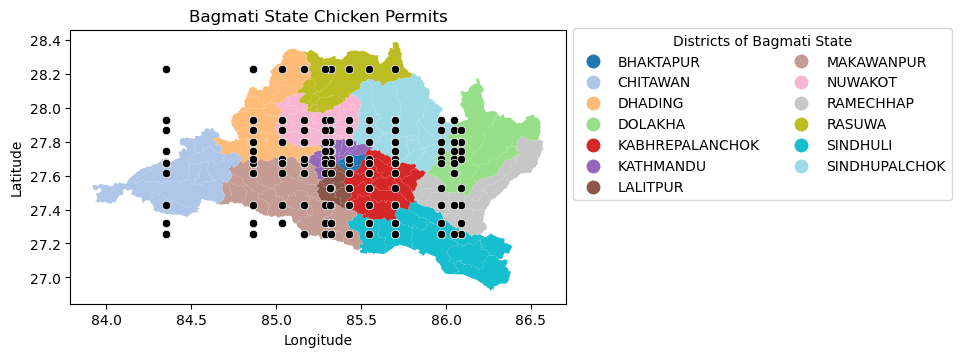

In [8]:
legend_kwds = {
    'title': 'Districts of Bagmati State',
    'loc': 'upper left',
    'ncol': 2,
    'bbox_to_anchor': (1, 1.03)
}
nepal_geo_df_shapefile[nepal_geo_df_shapefile["Province"] == "Bagmati"].plot(cmap="tab20", legend=True, column="DISTRICT", 
                                                                             legend_kwds=legend_kwds)
sns.scatterplot(x='lng', y='lat', data=chickens_df[chickens_df["state"] == "Bagmati"], color="black", edgecolor="white")
plt.title('Bagmati State Chicken Permits')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

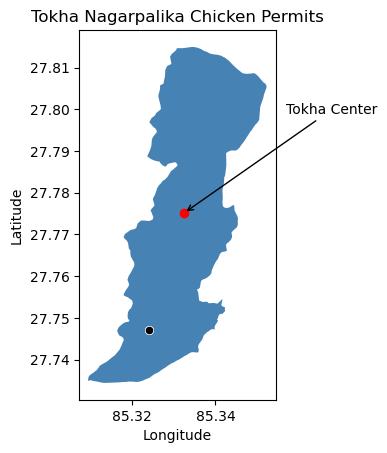

In [9]:
tokha_geo = nepal_geo_df_shapefile[nepal_geo_df_shapefile["GaPa_NaPa"] == "Tokha"]
ax = tokha_geo.plot(color="steelblue", legend=True)

tokha_center = tokha_geo.geometry.centroid
tokha_center.plot(ax=ax, color="r")
plt.annotate("Tokha Center", xy=(85.33247, 27.77515), xytext=(85.357, 27.799), arrowprops={"arrowstyle":"->"})

tokha_lat_range = (27.7300, 27.7700)
tokha_lng_range = (85.3200, 85.3600)
tokha_data = chickens_df[
    (chickens_df['lat'] >= tokha_lat_range[0]) & (chickens_df['lat'] <= tokha_lat_range[1]) &
    (chickens_df['lng'] >= tokha_lng_range[0]) & (chickens_df['lng'] <= tokha_lng_range[1])
]

sns.scatterplot(x='lng', y='lat', data=tokha_data, color="black", edgecolor="white")
plt.title('Tokha Nagarpalika Chicken Permits')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

298    POINT (85.29931 27.77749)
dtype: geometry


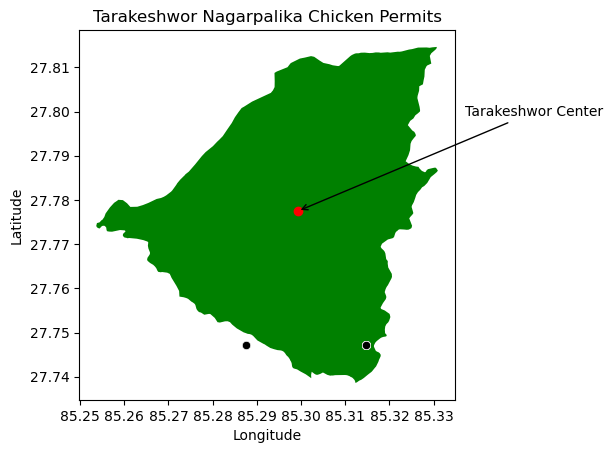

In [10]:
tarakeshwor_geo = nepal_geo_df_shapefile[nepal_geo_df_shapefile["GaPa_NaPa"] == "Tarakeshwor"]
ax = tarakeshwor_geo.plot(color="green", legend=True)

tarakeshwor_center = tarakeshwor_geo.geometry.centroid
print(tarakeshwor_center)
tarakeshwor_center.plot(ax=ax, color="r")
plt.annotate("Tarakeshwor Center", xy=(85.29931, 27.77749), xytext=(85.337, 27.799), arrowprops={"arrowstyle":"->"})

tarakeshwor_lat_range = (27.7350, 27.7850)
tarakeshwor_lng_range = (85.2600, 85.3200)
tarakeshwor_data = chickens_df[
    (chickens_df['lat'] >= tarakeshwor_lat_range[0]) & (chickens_df['lat'] <= tarakeshwor_lat_range[1]) &
    (chickens_df['lng'] >= tarakeshwor_lng_range[0]) & (chickens_df['lng'] <= tarakeshwor_lng_range[1])
]

sns.scatterplot(x='lng', y='lat', data=tarakeshwor_data, color="black", edgecolor="white")
plt.title('Tarakeshwor Nagarpalika Chicken Permits')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

In [65]:
tokha_and_tarakeshwor_street = folium.Map(location=[27.77515, 85.33247], zoom_start=13)
folium.GeoJson(tokha_geo.set_crs(epsg = 4326).geometry).add_to(tokha_and_tarakeshwor_street)
folium.GeoJson(tarakeshwor_geo.set_crs(epsg = 4326).geometry).add_to(tokha_and_tarakeshwor_street)

popup = "<strong>Trishan's Home<strong>"
popup2 = "<strong>Trishan's Home 2<strong>"
my_home_marker = folium.Marker(location=[27.740292, 85.317347], popup=popup)
home2_marker = folium.Marker(location=[27.74946977511511, 85.30026285719806], popup=popup2)
my_home_marker.add_to(tokha_and_tarakeshwor_street)
home2_marker.add_to(tokha_and_tarakeshwor_street)

tokha_and_tarakeshwor_street